# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [146]:
pd.set_option('display.max_columns', None)
dataset = 'dataset/1980_Accidents_UK.csv'
df_accidents_1980 = pd.read_csv(dataset, index_col=None)
df_accidents_1980.head(50)


C:\Users\mostafa\AppData\Local\Temp\ipykernel_5960\298454993.py:3: DtypeWarning: Columns (14,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents_1980 = pd.read_csv(dataset, index_col=None)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,19800113MKA18,1980,0113MKA18,288680.0,118000.0,NaN,NaN,Metropolitan Police,Slight,1,1,03/09/1980,Wednesday,12:50,Westminster,-1,-1,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1,19800113MKB18,1980,0113MKB18,280670.0,978000.0,NaN,NaN,Metropolitan Police,Slight,3,1,03/09/1980,Wednesday,12:50,Westminster,-1,-1,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
2,19800114MAA22,1980,0114MAA22,266880.0,562000.0,NaN,NaN,Metropolitan Police,Slight,2,2,04/09/1980,Thursday,12:00,Camden,-1,-1,A,502.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
3,19800114MAB22,1980,0114MAB22,290780.0,442000.0,NaN,NaN,Metropolitan Police,Slight,1,1,04/09/1980,Thursday,12:00,Camden,-1,-1,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,None within 50 metres,Zebra,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
4,19800116UGA99,1980,0116UGA99,307670.0,459000.0,NaN,NaN,Metropolitan Police,Serious,1,1,06/09/1980,Saturday,20:30,Lambeth,-1,-1,A,23.0,NaN,30.0,Crossroads,Auto traffic signal,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
5,19800116UGB99,1980,0116UGB99,320470.0,439000.0,NaN,NaN,Metropolitan Police,Slight,2,1,06/09/1980,Saturday,20:30,Lambeth,-1,-1,A,215.0,Single carriageway,30.0,More than 4 arms (not roundabout),Auto traffic signal,-1,NaN,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
6,1980011CSGA00,1980,011CSGA00,204090.0,210000.0,NaN,NaN,Metropolitan Police,Slight,1,1,12/09/1980,Friday,18:30,Barnet,-1,-1,A,5109.0,NaN,30.0,T or staggered junction,Give way or uncontrolled,-1,NaN,Data missing or out of range,Data missing or out of range,Daylight,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
7,1980011IUJA13,1980,011IUJA13,271360.0,533000.0,NaN,NaN,Metropolitan Police,Slight,3,1,18/09/1980,Thursday,20:45,Sutton,-1,-1,B,278.0,NaN,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Other,Dry,Data missing or out of range,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
8,1980011IUJB13,1980

# 2- EDA

**Does accident_index have uniqe values and what is it's relatiion to accident_year and accident_refrence?**

**Is there a relation between accident_severity and number_of_casualties?**

<AxesSubplot: xlabel='accident_severity', ylabel='number_of_casualties'>

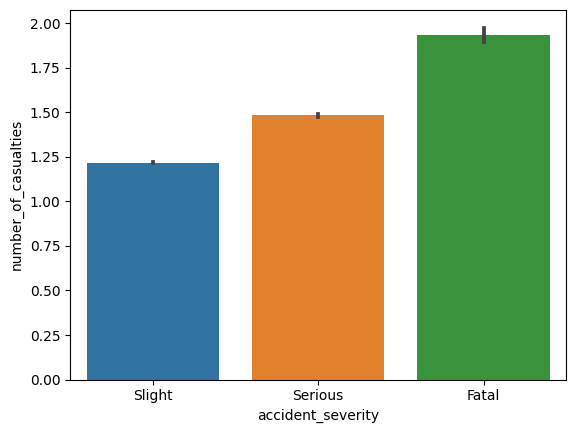

In [147]:
sns.barplot(x="accident_severity", y="number_of_casualties",
            data=df_accidents_1980)


As shown in the previous graph there is a direct relationship between accident_severity and number_of_casualties.

<AxesSubplot: xlabel='accident_severity', ylabel='speed_limit'>

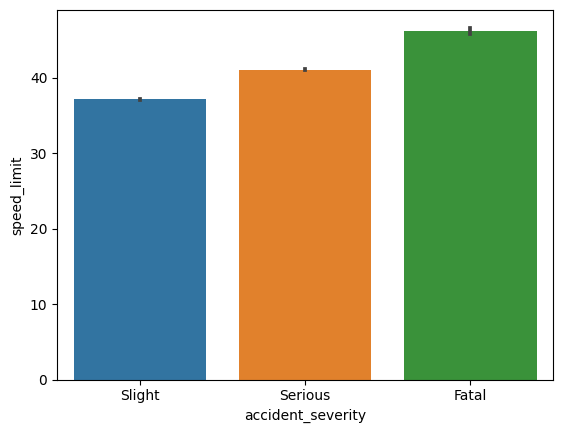

In [148]:
sns.barplot(x="accident_severity", y="speed_limit",
            data=df_accidents_1980)


In [149]:
perc_null = df_accidents_1980.isnull().mean() * 100
print(perc_null)


accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.115159
location_northing_osgr                           0.115159
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_cla

In [150]:
df_unique = df_accidents_1980.apply(lambda col: col.unique())
print(df_unique)

accident_index                                 [19800113MKA18, 19800113MKB18, 19800114MAA22, ...
accident_year                                                                             [1980]
accident_reference                             [0113MKA18, 0113MKB18, 0114MAA22, 0114MAB22, 0...
location_easting_osgr                          [288680.0, 280670.0, 266880.0, 290780.0, 30767...
location_northing_osgr                         [118000.0, 978000.0, 562000.0, 442000.0, 45900...
longitude                                                                                  [nan]
latitude                                                                                   [nan]
police_force                                   [Metropolitan Police, Cumbria, Lancashire, Mer...
accident_severity                                                       [Slight, Serious, Fatal]
number_of_vehicles                             [1, 3, 2, 4, 5, 6, 11, 7, 10, 9, 8, 14, 13, 16...
number_of_casualties          

# 3 - Cleaning Data

## Observing Missing and duplicate Data

 ### We replace all occurances of 'Data missing or out of range' and -1 with nan to have consistencey

In [151]:
perc_null = df_accidents_1980.isnull().mean() * 100
perc_null

accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.115159
location_northing_osgr                           0.115159
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_cla

In [152]:
df_unique = df_accidents_1980.apply(lambda col: col.unique())
df_unique

accident_index                                 [19800113MKA18, 19800113MKB18, 19800114MAA22, ...
accident_year                                                                             [1980]
accident_reference                             [0113MKA18, 0113MKB18, 0114MAA22, 0114MAB22, 0...
location_easting_osgr                          [288680.0, 280670.0, 266880.0, 290780.0, 30767...
location_northing_osgr                         [118000.0, 978000.0, 562000.0, 442000.0, 45900...
longitude                                                                                  [nan]
latitude                                                                                   [nan]
police_force                                   [Metropolitan Police, Cumbria, Lancashire, Mer...
accident_severity                                                       [Slight, Serious, Fatal]
number_of_vehicles                             [1, 3, 2, 4, 5, 6, 11, 7, 10, 9, 8, 14, 13, 16...
number_of_casualties          

In [153]:
accident_index_unique_counts = len(
    df_accidents_1980["accident_index"].unique())
accident_refernce_unique_counts = len(
    df_accidents_1980["accident_reference"].unique())
number_of_entries = len(df_accidents_1980)
"Number of Unique accident_index: " + \
    str(accident_index_unique_counts), "Number of Unique accident_refrence: " + \
    str(accident_refernce_unique_counts), "Number of total entries:  " + \
    str(number_of_entries)

(np.equal((df_accidents_1980["accident_year"].astype(str) +
          df_accidents_1980["accident_reference"]), df_accidents_1980["accident_index"])).all()

df_accidents_1980["accident_year"].unique()

array([1980], dtype=int64)

In [154]:
num_c_un = df_accidents_1980[df_accidents_1980['first_road_class']
                         == 'C']['first_road_class'].count() + df_accidents_1980[df_accidents_1980['first_road_class']
                                                                                       == 'Unclassified']['first_road_class'].count()
num_missing_road = df_accidents_1980[df_accidents_1980['first_road_number']
                                     == 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ']['first_road_class'].count()
if num_c_un == num_missing_road:
    print(True)
else:
    print(False)

True


## Handling Missing data

In [155]:
df_accidents_1980_clean = df_accidents_1980.replace(
    'Data missing or out of range', np.nan)
df_accidents_1980_clean = df_accidents_1980_clean.replace(
    -1, np.nan)
df_accidents_1980_clean = df_accidents_1980_clean.replace(
    '-1', np.nan)
df_accidents_1980_clean = df_accidents_1980_clean.replace(
    'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', 0)
df_null = df_accidents_1980_clean.isnull().mean() * 100
df_null

accident_index                                   0.000000
accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.115159
location_northing_osgr                           0.115159
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                   100.000000
local_authority_highway                        100.000000
first_road_cla

In [156]:
df_accidents_1980_clean = df_accidents_1980_clean.dropna(
    axis='columns', how='all')

In [157]:
(np.equal((df_accidents_1980["accident_year"].astype(str) +
          df_accidents_1980["accident_reference"]), df_accidents_1980["accident_index"])).all()  # checking the accident_year concatenated to the accident_reference is equal to the accident_index
df_accidents_1980_clean = df_accidents_1980_clean.drop(
    'accident_index', axis=1)  # dropping the accident_index

df_accidents_1980_clean = df_accidents_1980_clean.set_index(
    'accident_reference')


In [158]:
df_accidents_1980_clean = df_accidents_1980_clean.dropna(
    axis='index', how='any', subset=['location_easting_osgr', 'location_easting_osgr', 'junction_detail', 'first_road_number', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'carriageway_hazards'])
#df_accidents_1980_clean = df_accidents_1980_clean.drop('second_road_number',axis=1)



In [159]:
df_filter = df_accidents_1980_clean[(df_accidents_1980_clean['second_road_class'].notna()) & ~(
    df_accidents_1980_clean['second_road_number'].notna())].index
df_accidents_1980_clean = df_accidents_1980_clean.drop(df_filter)
print((df_accidents_1980_clean[df_accidents_1980_clean['junction_detail']
                         == 'Not at junction or within 20 metres']['junction_detail'].count()) / len(df_accidents_1980_clean.index) * 100)

print(df_null['junction_control'])

41.65815887352815
41.71415137194271


In [160]:
df_filter = df_accidents_1980_clean[((df_accidents_1980_clean['junction_detail'] != 'Not at junction or within 20 metres') & ~(
    df_accidents_1980_clean['junction_control'].notna())) |((df_accidents_1980_clean['junction_detail'].isna()) & (
    df_accidents_1980_clean['junction_control'].notna()))].index
df_accidents_1980_clean = df_accidents_1980_clean.drop(df_filter)
print((df_accidents_1980_clean[df_accidents_1980_clean['junction_detail']
                         == 'Not at junction or within 20 metres']['junction_detail'].count()) / len(df_accidents_1980_clean.index) * 100)

print(df_null['junction_control'])

41.677514970659516
41.71415137194271


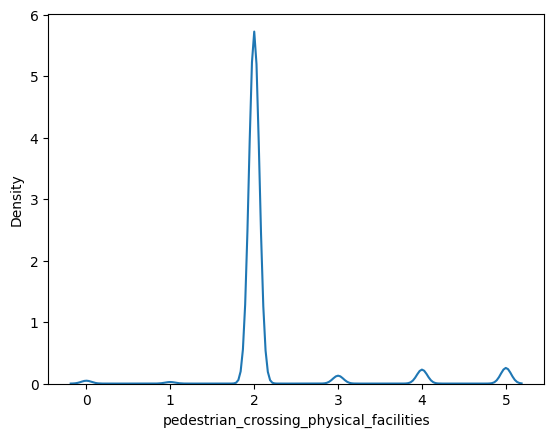

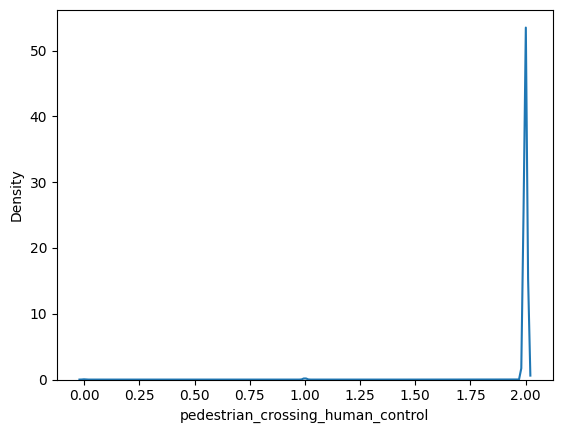

In [161]:

data = df_accidents_1980_clean[['pedestrian_crossing_human_control',
                                 'pedestrian_crossing_physical_facilities']].dropna()
data['pedestrian_crossing_physical_facilities'] = data['pedestrian_crossing_physical_facilities'].astype(
    'category')
data['pedestrian_crossing_physical_facilities'] = data['pedestrian_crossing_physical_facilities'].cat.codes

data['pedestrian_crossing_human_control'] = data['pedestrian_crossing_human_control'].astype(
    'category')
data['pedestrian_crossing_human_control'] = data['pedestrian_crossing_human_control'].cat.codes

sns.kdeplot(data["pedestrian_crossing_physical_facilities"])

plt.show()
sns.kdeplot(data["pedestrian_crossing_human_control"])
plt.show()

In [162]:
data["pedestrian_crossing_human_control"].median()
ind = data[data["pedestrian_crossing_human_control"] == data["pedestrian_crossing_human_control"].median()].index[0]
pedesMedian = df_accidents_1980_clean["pedestrian_crossing_human_control"][ind]
df_accidents_1980_clean["pedestrian_crossing_human_control"] = df_accidents_1980_clean["pedestrian_crossing_human_control"].replace(np.nan, pedesMedian)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null


accident_year                               0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  11.281168
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.677515
second_road_class                          55.202179
second_road_number                         55.

In [163]:
data["pedestrian_crossing_physical_facilities"].median()
ind = data[data["pedestrian_crossing_physical_facilities"] == data["pedestrian_crossing_physical_facilities"].median()].index[0]
pedesMedian = df_accidents_1980_clean["pedestrian_crossing_physical_facilities"][ind]
df_accidents_1980_clean["pedestrian_crossing_physical_facilities"] = df_accidents_1980_clean["pedestrian_crossing_physical_facilities"].replace(np.nan, pedesMedian)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null

accident_year                               0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  11.281168
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.677515
second_road_class                          55.202179
second_road_number                         55.

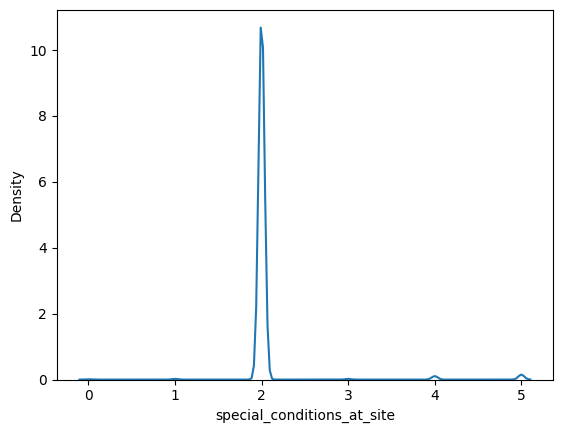

In [164]:
df_accidents_1980_clean["special_conditions_at_site"].unique()
data = df_accidents_1980_clean[['special_conditions_at_site']].dropna()
data['special_conditions_at_site'] = data['special_conditions_at_site'].astype(
    'category')
data['special_conditions_at_site'] = data['special_conditions_at_site'].cat.codes
sns.kdeplot(data["special_conditions_at_site"])



In [165]:
data["special_conditions_at_site"].median()
ind = data[data["special_conditions_at_site"] == data["special_conditions_at_site"].median()].index[0]
specMedian = df_accidents_1980_clean["special_conditions_at_site"][ind]
df_accidents_1980_clean["special_conditions_at_site"] = df_accidents_1980_clean["special_conditions_at_site"].replace(np.nan, pedesMedian)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null

accident_year                               0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                  11.281168
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                           41.677515
second_road_class                          55.202179
second_road_number                         55.

## Findings and conclusions

accident_year                              0.0
location_easting_osgr                      0.0
location_northing_osgr                     0.0
police_force                               0.0
accident_severity                          0.0
number_of_vehicles                         0.0
number_of_casualties                       0.0
date                                       0.0
day_of_week                                0.0
time                                       0.0
local_authority_district                   0.0
first_road_class                           0.0
first_road_number                          0.0
road_type                                  0.0
speed_limit                                0.0
junction_detail                            0.0
junction_control                           0.0
pedestrian_crossing_human_control          0.0
pedestrian_crossing_physical_facilities    0.0
light_conditions                           0.0
weather_conditions                         0.0
road_surface_

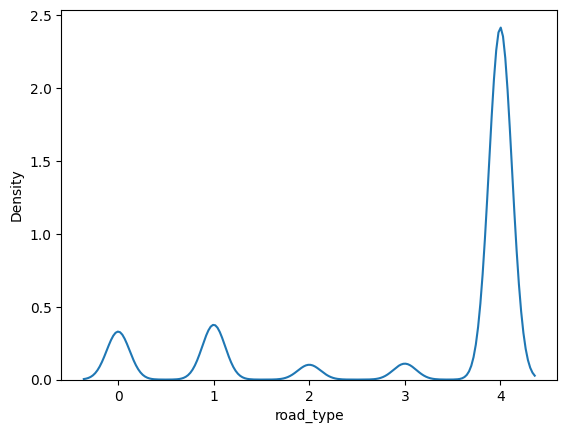

In [168]:

data = df_accidents_1980_clean[['road_type']].dropna()
data['road_type'] = data['road_type'].astype(
    'category')
data['road_type'] = data['road_type'].cat.codes
sns.kdeplot(data["road_type"])
data["road_type"].median()
ind = data[data["road_type"] == data["road_type"].median()].index[0]
specMedian = df_accidents_1980_clean["road_type"][ind]
df_accidents_1980_clean["road_type"] = df_accidents_1980_clean["road_type"].replace(np.nan, pedesMedian)
df_accidents_1980_clean["junction_control"] = df_accidents_1980_clean["junction_control"].replace(np.nan, "Non")

df_accidents_1980_clean = df_accidents_1980_clean.drop('second_road_class',axis=1)
df_accidents_1980_clean = df_accidents_1980_clean.drop('second_road_number',axis=1)
df_null = df_accidents_1980_clean.isna().mean() * 100

df_null


## Observing outliers

In [169]:
df_accidents_1980_clean.head(50)

,accident_year,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_reference,,,,,,,,,,,,,,,,,,,,,,,,
0113MKA18,1980,288680.0,118000.0,Metropolitan Police,Slight,1,1,03/09/1980,Wednesday,12:50,Westminster,A,40.0,Single carriageway,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0113MKB18,1980,280670.0,978000.0,Metropolitan Police,Slight,3,1,03/09/1980,Wednesday,12:50,Westminster,A,4.0,Dual carriageway,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0114MAA22,1980,266880.0,562000.0,Metropolitan Police,Slight,2,2,04/09/1980,Thursday,12:00,Camden,A,502.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0114MAB22,1980,290780.0,442000.0,Metropolitan Police,Slight,1,1,04/09/1980,Thursday,12:00,Camden,A,5202.0,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
0116UGA99,1980,307670.0,459000.0,Metropolitan Police,Serious,1,1,06/09/1980,Saturday,20:30,Lambeth,A,23.0,No physical crossing facilities within 50 metres,30.0,Crossroads,Auto traffic signal,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
0116UGB99,1980,320470.0,439000.0,Metropolitan Police,Slight,2,1,06/09/1980,Saturday,20:30,Lambeth,A,215.0,Single carriageway,30.0,More than 4 arms (not roundabout),Auto traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
011CSGA00,1980,204090.0,210000.0,Metropolitan Police,Slight,1,1,12/09/1980,Friday,18:30,Barnet,A,5109.0,No physical crossing facilities within 50 metres,30.0,T or staggered junction,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Dry,No physical crossing facilities within 50 metres,None
011IUJA13,1980,271360.0,533000.0,Metropolitan Police,Slight,3,1,18/09/1980,Thursday,20:45,Sutton,B,278.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None
011IUJB13,1980,271360.0,533000.0,Metropolitan Police,Slight,1,1,18/09/1980,Thursday,20:45,Sutton,B,278.0,No physical crossing facilities within 50 metres,30.0,Not at junction or within 20 metres,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Other,Dry,No physical crossing facilities within 50 metres,None


## Handling outliers

## Findings and conclusions

# 4 - Data transformation

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet